# Compte rendu TP

## 1. Prise en main rapide

1. Lancer Octave ou Python. Récupérer l’ensemble des images qui pourront être utilisées. Le dossier global contient un programme de démonstration (demo.m ou demo.py) ainsi que des images pour tests (dossier imagesTP).
2. Tester le programme qui lit puis affiche une image couleur ainsi que ses trois composantes. Les tests seront réalisés à partir des images disponibles dans le répertoire fourni.

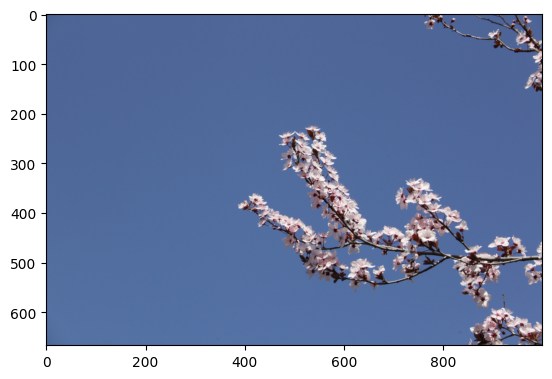

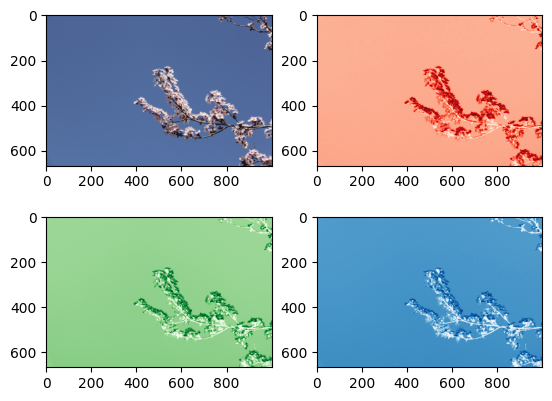

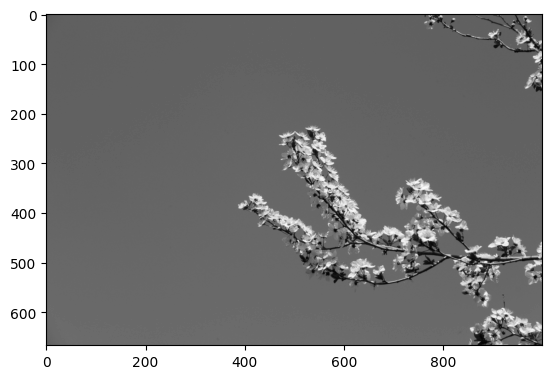

In [104]:
import numpy as np
from scipy import ndimage 
from matplotlib import pyplot as plt
import cv2 as cv

basepath = "./imagesTP/"

#Ouvrir une image
img_cerisier = cv.imread(basepath+"CerisierP.jpg")
img_cerisier = cv.cvtColor(img_cerisier,cv.COLOR_BGR2RGB)

#Afficher une image
plt.figure()
plt.imshow(img_cerisier)

#Afficher les canaux
rouge = img_cerisier[:,:, 0]
vert = img_cerisier[:,:, 1]
bleu = img_cerisier[:,:, 2]
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(img_cerisier)
plt.subplot(2, 2, 2)
plt.imshow(rouge, cmap="Reds")
plt.subplot(2, 2, 3)
plt.imshow(vert, cmap="Greens")
plt.subplot(2, 2, 4)
plt.imshow(bleu, cmap="Blues")

# Transformation en niveau de gris
img_cerisier_G = cv.cvtColor(img_cerisier,cv.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(img_cerisier_G, cmap="gray")

plt.show()


3. Tester la fonction histogramme des niveaux de gris d’une image.

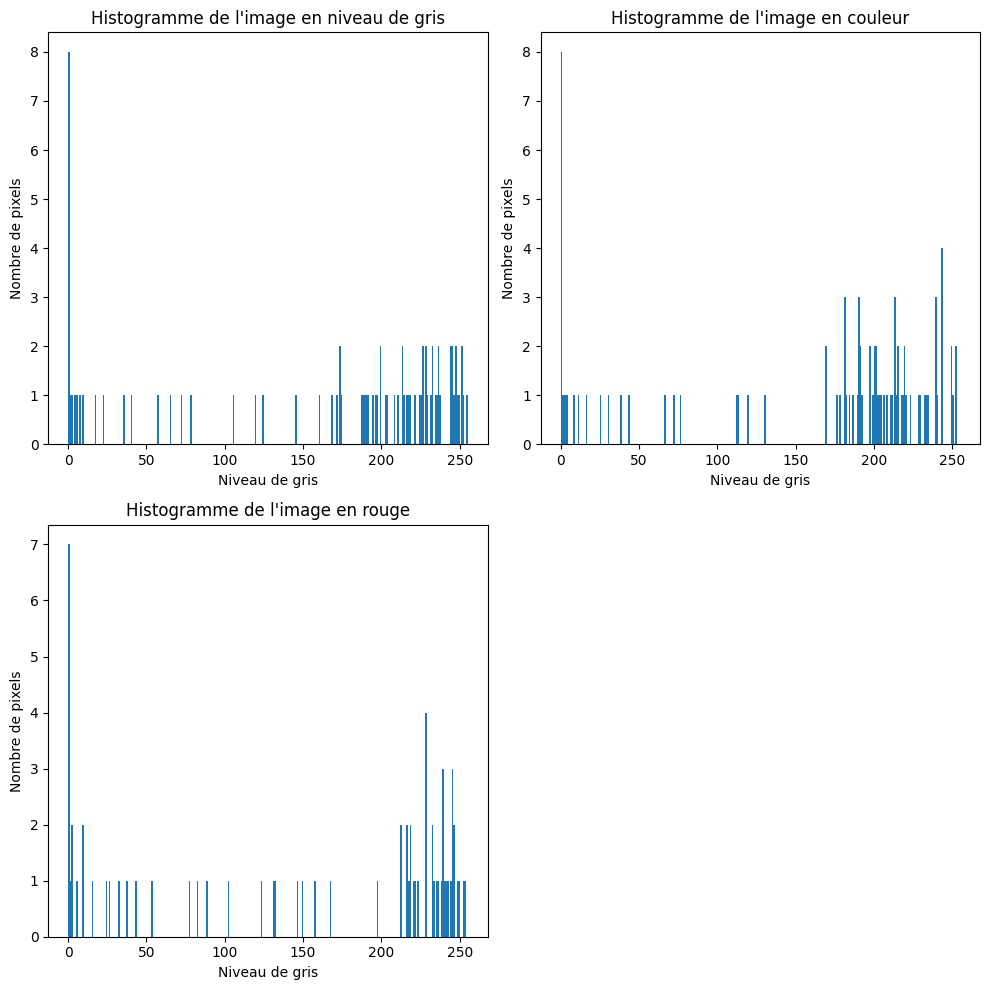

In [105]:

def grey_histogramme(img):
	result = np.zeros(256)
	
	for x in range(img.shape[0]-1):
		for y in range(img.shape[1]-1):
			grey = int(img[x,y]) if len(img.shape) == 2 else int(img[x,y].sum()/3)
			result[grey]= result[grey] + 1
	return (result,np.arange(0,256,1))

def plotHist(img):
	data,bins=grey_histogramme(img)
	plt.hist(data,bins=bins)

def displayHist(img):
	plotHist(img)
	plt.show()


plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plotHist(img_cerisier_G)
plt.title("Histogramme de l'image en niveau de gris")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")

plt.subplot(2, 2, 2)
plotHist(img_cerisier)
plt.title("Histogramme de l'image en couleur")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")

plt.subplot(2, 2, 3)
plotHist(rouge)
plt.title("Histogramme de l'image en rouge")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")

plt.tight_layout()
plt.show()




4. Écrire et tester un programme permettant de binariser une image. Tout d’abord le seuil sera entré en paramètre (choisi à partir de l’examen visuel de l’histogramme de l’image), puis il sera obtenu automatiquement à partir d’une fonction basée sur la méthode des moments statistiques (cf cours).

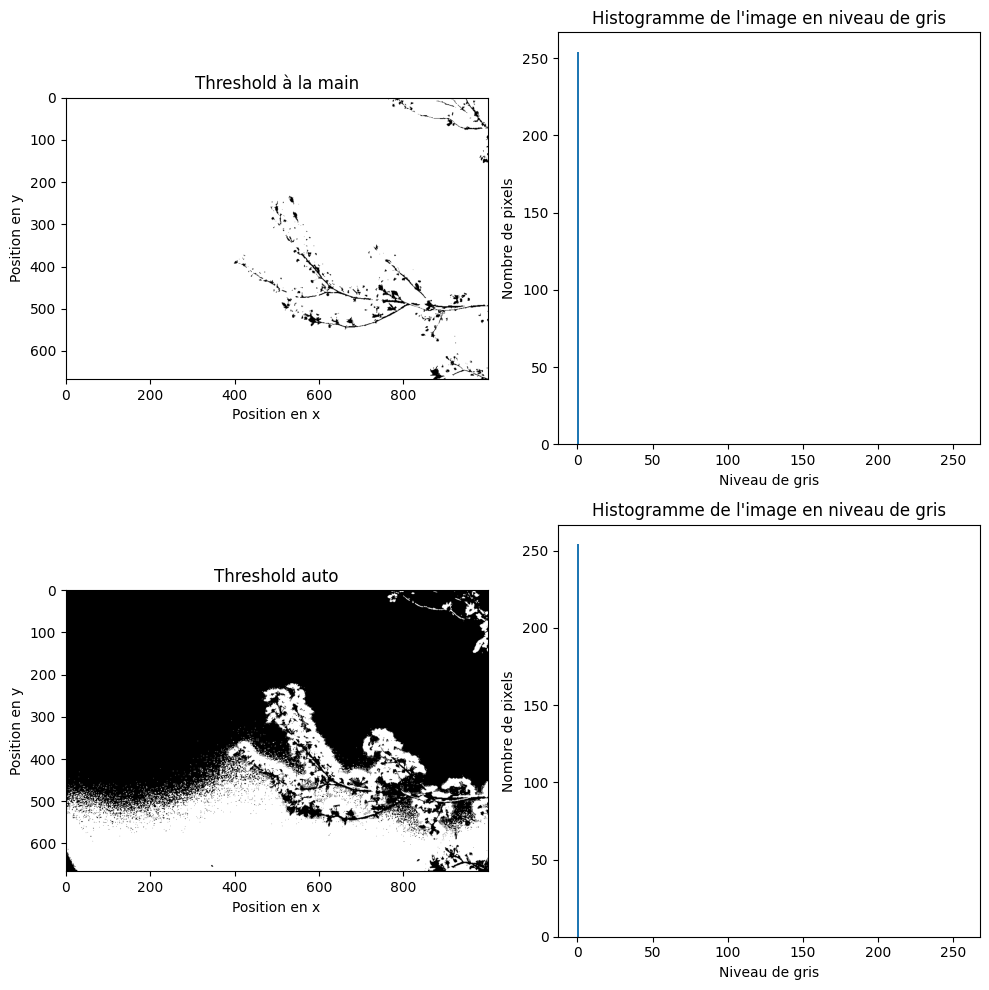

In [106]:
def threshold(img, trsh):
	result = img
	min = 0
	max = 255
	for i in range(0, img.shape[0]):
		for j in range(0, img.shape[1]):
			if img[i][j] > trsh:
				result[i][j] = max
			else:
				result[i][j] = min
	return result

def moment_stat(img,moment_order):
	hist = grey_histogramme(img)
	sum = 0
	for X in range(0, 256):
		sum += hist[0][X]*X**moment_order
	return sum/(img.shape[0]*img.shape[1])

def auto_threshold(img):
	moment = moment_stat(img,1)
	return threshold(img,moment)

tresh_img = threshold(cv.cvtColor(img_cerisier,cv.COLOR_RGB2GRAY),50)
tresh_img_auto = auto_threshold(cv.cvtColor(img_cerisier,cv.COLOR_RGB2GRAY))

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(tresh_img,"grey")
plt.title("Threshold à la main")
plt.xlabel("Position en x")
plt.ylabel("Position en y")

plt.subplot(2, 2, 2)
plotHist(tresh_img)
plt.title("Histogramme de l'image en niveau de gris")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")

plt.subplot(2, 2, 3)
plt.imshow(tresh_img_auto,"grey")
plt.title("Threshold auto")
plt.xlabel("Position en x")
plt.ylabel("Position en y")

plt.subplot(2, 2, 4)
plotHist(tresh_img_auto)
plt.title("Histogramme de l'image en niveau de gris")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")

plt.tight_layout()
plt.show()





5. Écrire un programme qui réalise les opérations suivantes :
     1. Calcul et affichage de l’histogramme d’une image (appel de la fonction histogramme réalisée en question 3) ;
     2. Égalisation d’histogramme sur cette image ;
     3. Affichage de la fonction de répartition, de l’histogramme de l’image égalisée. Tester ce programme avec l’image rue.jpg issue du répertoire.

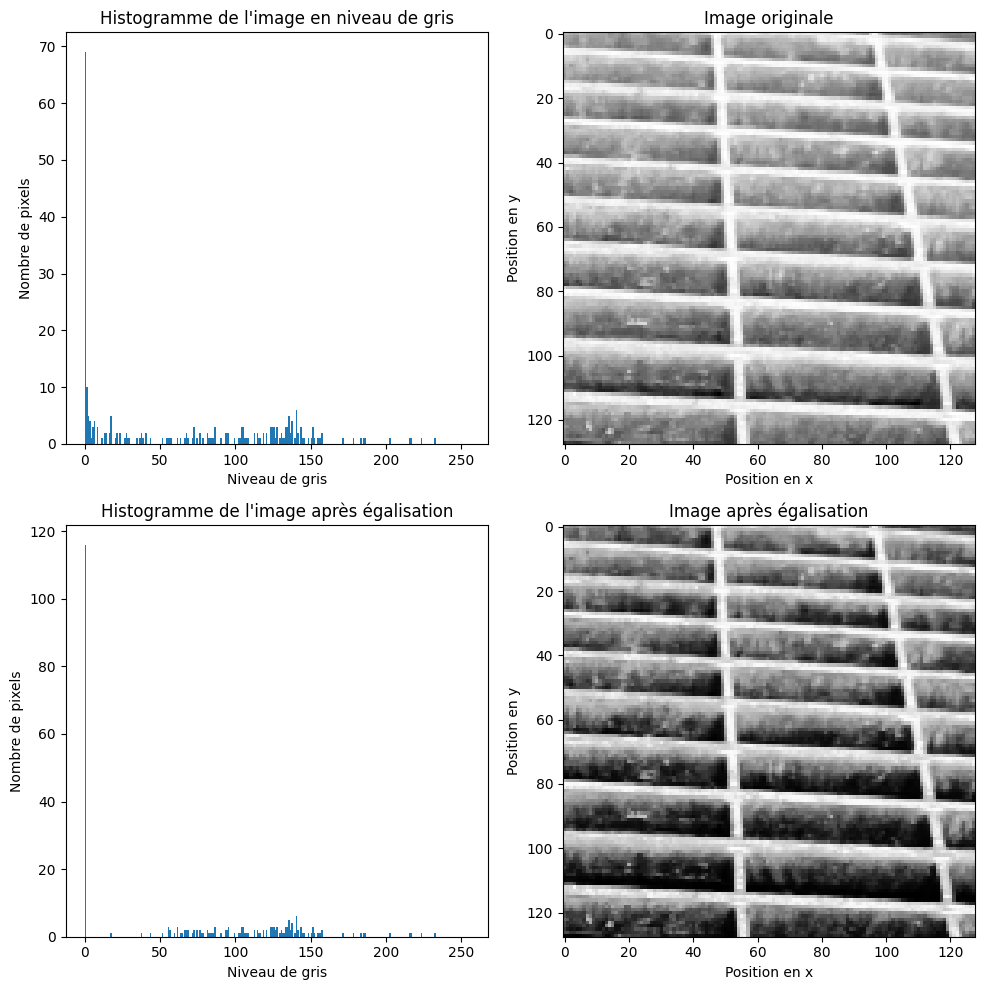

In [107]:
def equalizeHist(img):
	max_grey = 255
	n_pixels = img.shape[0]*img.shape[1]
	histo = grey_histogramme(img)[0]
	lookup_table = np.zeros(256)
	lookup_table[0] = histo[0]
	for i in range(1,max_grey+1):
		lookup_table[i] = lookup_table[i-1]+histo[i]
	for i in range(0,max_grey+1):
		lookup_table[i] = max_grey*lookup_table[i]/n_pixels
	for x in range(img.shape[0]):
		for y in range(img.shape[1]):
			img[x,y] = lookup_table[img[x,y]]
	return img

img_metal = cv.imread(basepath+"Metal0007GP.png")
img_metal = cv.cvtColor(img_metal,cv.COLOR_BGR2RGB)


plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plotHist(img_metal)
plt.title("Histogramme de l'image en niveau de gris")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")

plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(img_metal,cv.COLOR_RGB2GRAY),  cmap='gray')
plt.title("Image originale")
plt.xlabel("Position en x")
plt.ylabel("Position en y")

plt.subplot(2, 2, 3)
result = equalizeHist(img_metal)
plotHist(result)
plt.title("Histogramme de l'image après égalisation")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")

plt.subplot(2, 2, 4)
plt.imshow(result,  cmap='gray')
plt.title("Image après égalisation")
plt.xlabel("Position en x")
plt.ylabel("Position en y")

plt.tight_layout()
plt.show()


6. Écrire un programme qui permet de réaliser des détections de contours d’une image à l’aide des filtres de Roberts, Prewitt et Sobel. Les tests seront effectués à partir des images suivantes
    1. Mire blanche de 100x100 pixels centrée sur une image noire de 256x256,
    2. Images disponibles dans le répertoire imagesTP.

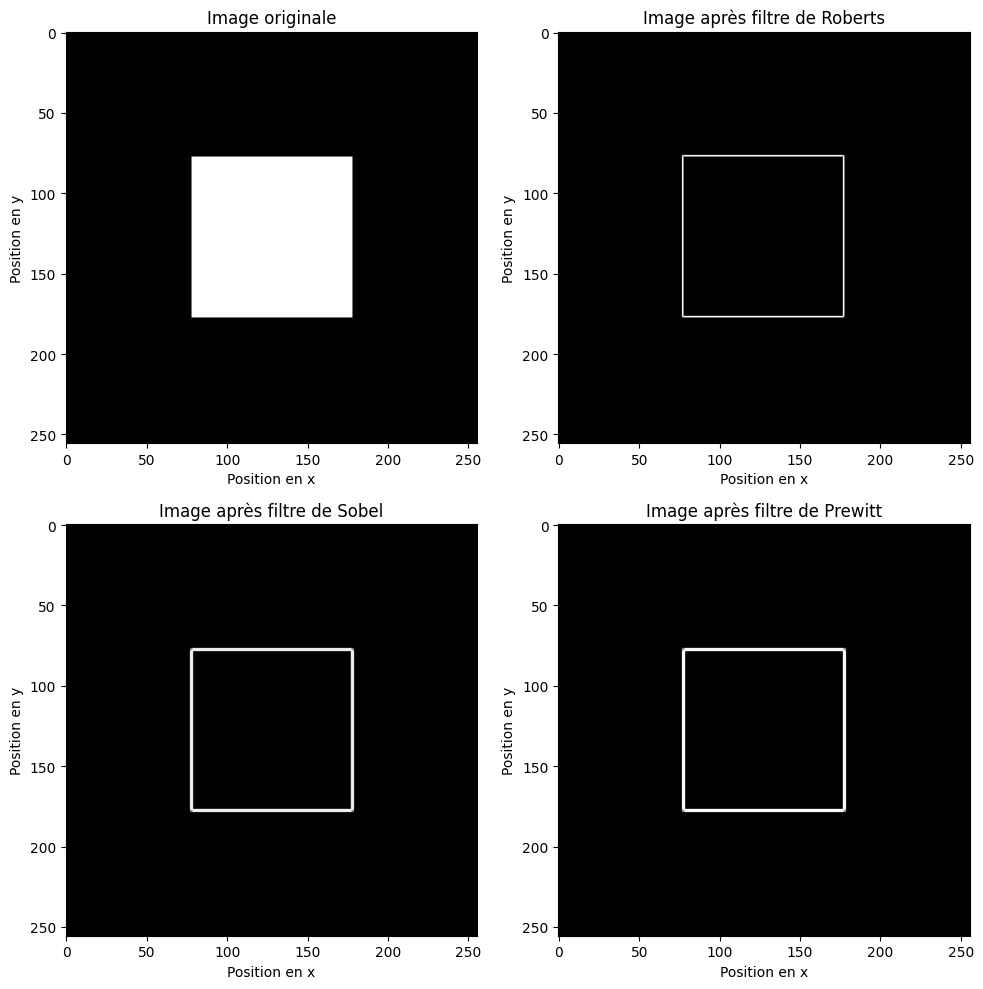

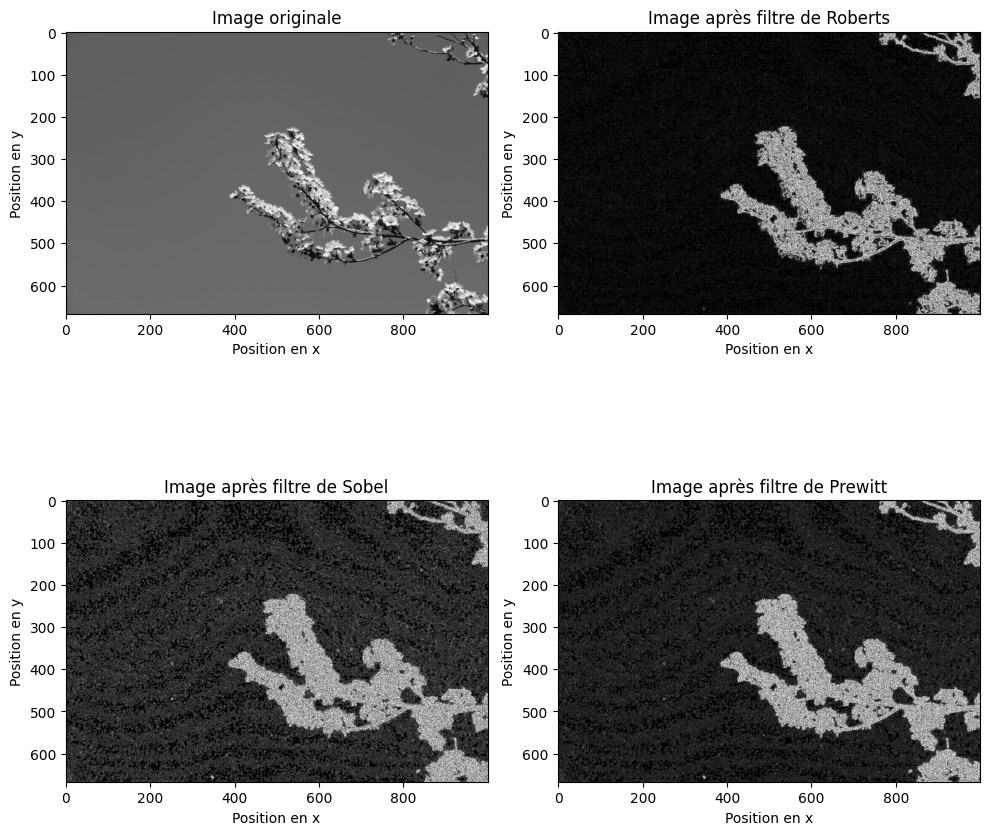

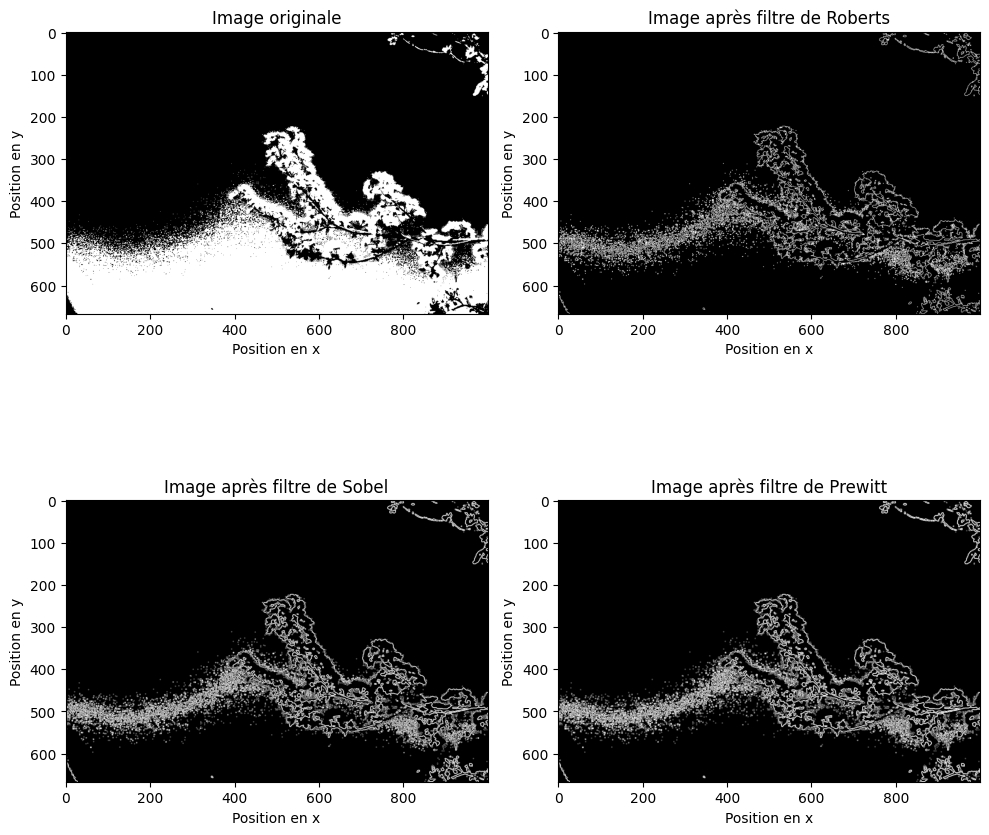

In [108]:
def mask_applier(img, vert_mask, hor_mask):
    
    vertical = ndimage.convolve( img, vert_mask ) 
    horizontal = ndimage.convolve( img, hor_mask ) 
    edged_img = np.sqrt( np.square(horizontal) + np.square(vertical)) 
    return edged_img

def gen_mire():
    mire = np.zeros((256, 256, 3), dtype=np.uint8)
    white_square_size = 100
    start_point = (256 - white_square_size) // 2
    mire[start_point:start_point + white_square_size, start_point:start_point + white_square_size] = [255, 255, 255]
    return mire


def exercice_6(img):
    img = cv.cvtColor(img, cv.COLOR_RGB2GRAY) if len(img.shape) == 3 else img
    roberts_mask_ver = np.array([[-1, 0],
                                [0, 1]])
    roberts_mask_hor = np.array([[0, -1],
                                [1, 0]])
    sobel_mask_ver = np.array([[1,0,-1],
                        [2,0,-2],
                        [1,0,-1]])
    sobel_mask_hor = np.array([[1,2,1],
                        [0,0,0],
                        [-1,-2,-1]])
    prewitt_mask_ver = np.array([[1,0,-1],
                            [1,0,-1],
                            [1,0,-1]])
    prewitt_mask_hor = np.array([[1,1,1],
                                [0,0,0],
                                [-1,-1,-1]])

    
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Image originale")
    plt.xlabel("Position en x")
    plt.ylabel("Position en y")

    plt.subplot(2, 2, 2)
    result = mask_applier(img,roberts_mask_ver, roberts_mask_hor)
    plt.imshow(result, cmap='gray')
    plt.title("Image après filtre de Roberts")
    plt.xlabel("Position en x")
    plt.ylabel("Position en y")



    plt.subplot(2, 2, 3)
    result = mask_applier(img,sobel_mask_hor, sobel_mask_ver)
    plt.imshow(result, cmap='gray')
    plt.title("Image après filtre de Sobel")
    plt.xlabel("Position en x")
    plt.ylabel("Position en y")


    plt.subplot(2, 2, 4)
    result = mask_applier(img,prewitt_mask_hor, prewitt_mask_ver)
    plt.imshow(result, cmap='gray')
    plt.title("Image après filtre de Prewitt")
    plt.xlabel("Position en x")
    plt.ylabel("Position en y")

    plt.tight_layout()
    plt.show()


img_mire = gen_mire()
exercice_6(img_mire)
exercice_6(img_cerisier_G)
exercice_6(tresh_img_auto)

## 2. Transformée de Fourier

La transformée de Fourier 2D est une généralisation de la version 1D. Elle permet de passer d’une représentation de l’image dans le domaine spatial (coordonnées $n,m$) à une représentation dans le domaine fréquentiel (coordonnées $f_1,f_2$). La transformée de Fourier d’une séquence discrète 2D $s[n,m]$ s’exprime sous la forme :

$$
	S[f_1,f_2]=\sum_{n=0}^{N-1}\sum_{n=0}^{M-1}s[n,m]e^{-2j\pi(f_1n+f_2m)}
$$

avec $f_1\times f_2=[0,\frac{1}{N},\frac{2}{N},...,\frac{K}{N},...,1-\frac{1}{N}]\times[0,\frac{1}{M},\frac{2}{M},...,\frac{k}{M},...,1-\frac{1}{M}]$

Il apparaît que la transformée de Fourier 2D est séparable. Le principal avantage de cette dissociation est de permettre un calcul rapide de la transformée de Fourier 2D à partir de l'algorithme 1D.

<div style="border:2px solid black; padding 0.5px;">
<strong>Travail demandé :</strong>

- A partir de sa définition proposer une méthodologie réalisant le calcul de la transformée de Fourier 2D sachant que l’on possède la fonction fft permettant de calculer une TFD 1D
</div>

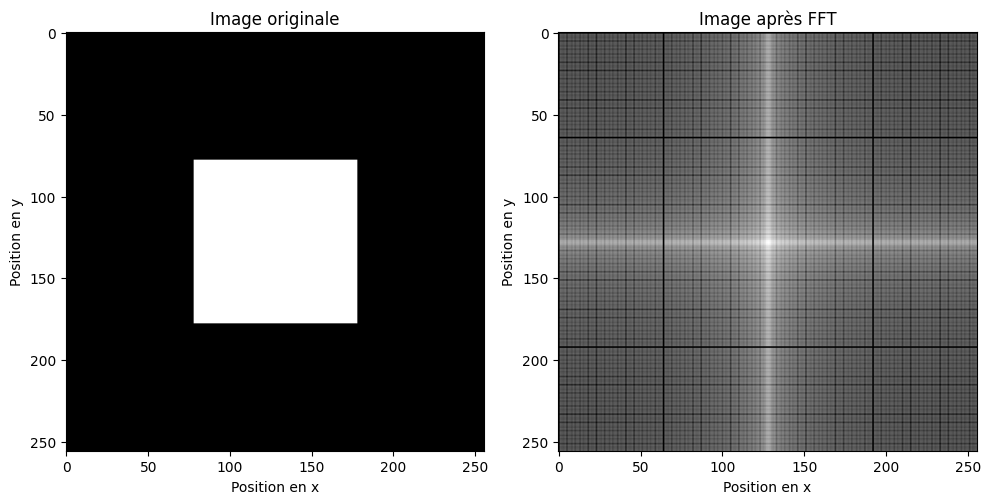

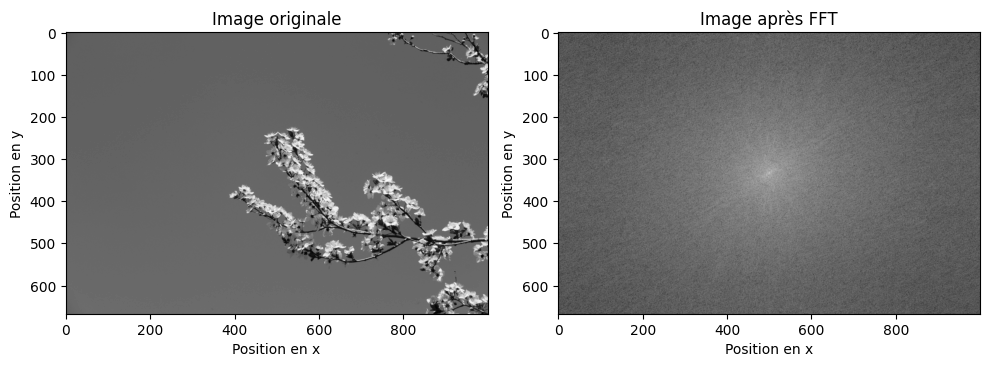

In [109]:
def fft2_d_spectrum(A):
    A = cv.cvtColor(A, cv.COLOR_RGB2GRAY) if len(A.shape) == 3 else A
    # Calculer la TF2D
    F = fft_2d(A)
    
    # Calculer le spectre de magnitude
    magnitude_spectrum = np.abs(F)
    
    # Décaler le zéro de fréquence au centre
    magnitude_spectrum_shifted = np.fft.fftshift(magnitude_spectrum)
    
    # Appliquer une échelle logarithmique
    return np.log1p(magnitude_spectrum_shifted)  # log(1 + x) pour éviter log(0)
    

def fft_2d(image):
    # Dimensions de la matrice A
    M, N = image.shape
    
    # Appliquer fft sur chaque ligne
    tmp_matrice = np.zeros((M, N), dtype=complex)
    for m in range(M):
        tmp_matrice[m, :] = np.fft.fft(image[m, :])
    
    # Appliquer fft sur chaque colonne
    spectrum = np.zeros((M, N), dtype=complex)
    for n in range(N):
        spectrum[:, n] = np.fft.fft(tmp_matrice[:, n])
    
    return spectrum


def exercice_7(img):
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Image originale")
    plt.xlabel("Position en x")
    plt.ylabel("Position en y")

    plt.subplot(2, 2, 2)
    result = fft2_d_spectrum(img)
    plt.imshow(result, cmap='gray')
    plt.title("Image après FFT")
    plt.xlabel("Position en x")
    plt.ylabel("Position en y")


    plt.tight_layout()
    plt.show()

exercice_7(img_mire)
exercice_7(img_cerisier_G)

### 2.1.a. Harmoniques pures

Vous allez maintenant étudier le spectre de Fourier 2D pour différents types d’images.
Vous avez à votre disposition la fonction atom qui s’utilise de la façon suivante : `img=atom(N,M,f1,f2);`
Cette fonction permet de créer des images synthétiques de taille $N \times M$ composées de
bandes périodiques se répétant avec une fréquence $f_1$ selon $n$ et $f_2$ selon $m$.

<div style="border:2px solid black; padding 0.5px;">
<strong>Travail demandé :</strong>

- Créer une image 128 × 128 présentant des oscillations de fréquence 0.1 selon n et 0 selon m en tapant (fe=1) :  
  `img=atom(N,M,f1,f2);`
- Visualiser l’image. Commenter son contenu.
- Commenter le code de la fonction fourier2d(img,fe).
- Visualiser le spectre 2D de cette image en utilisant la fonction précédente.
- Commenter en mettant en avant la corrélation de ce spectre avec l’information spatiale contenue dans le signal 2D, ainsi que ses particularités et propriétés.
- Afin d’appréhender entièrement les différents aspects d’une analyse spectrale d’un motif harmonique pur 2D, vous allez créer, analyser et commenter, suivant le même mode, des images correspondant aux paramètres suivants (N = 128, M = 128) :
  - $f_1=0.1$ $f_2=0$
  - $f_1=0$ $f_2=0.1$
  - $f_1=0.3$ $f_2=0.3$
  - $f_1=-0.3$ $f_2=0.1$

N’oubliez pas de comparer aussi les différences entre les images !
</div>


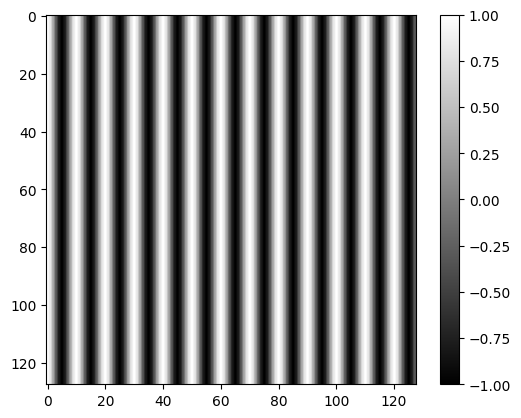

<Figure size 640x480 with 0 Axes>

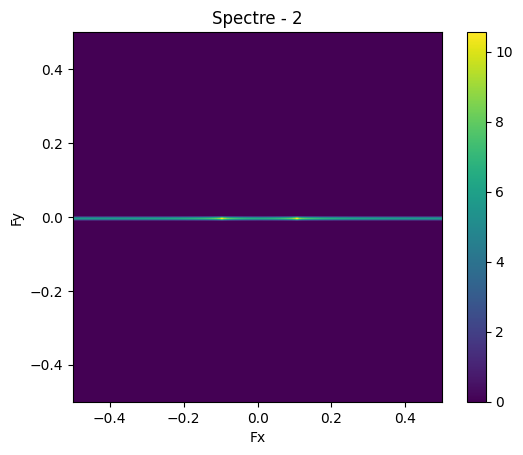

In [120]:
import numpy as np

from matplotlib import pyplot as plt
import cv2 as cv
from mpl_toolkits import mplot3d

def affiche_image(img):
    plt.figure()
    plt.imshow(img,cmap="gray")
    plt.colorbar()

def  atom(n,m,fx,fy):
    img=np.zeros((n, m))
    x = np.array(np.arange(0,m))
    y = np.arange(0,n)
    e1 = np.exp(1j*2*np.pi*fx*x)
    e2 = np.exp(1j*2*np.pi*fy*y)
    for i in range(n):
        for j in range(m):
            img[i,j] = np.real(e2[i]*np.conjugate(e1[j]))
    return img

def fourier2d(img,fe):
    # récupération des dimensions de l'image
    [height, width] =img.shape

    # Calcul du spectre
    f = np.abs(np.fft.fftshift(np.fft.fft2(img)))
    # positionnement au milieu
    n = width/2
    m = height/2

    # création de la figure
    plt.figure()
    # modélisation 3D du spectre. En Z l'intensité
    # ax = plt.axes(projection='3d')
    x = np.arange(-n/width, n/width, float(fe/width))
    y = np.arange(-m/height, m/height, float(fe/height))
    # X, Y = np.meshgrid(x, -y)
    # print(X.shape)
    # ax.plot_surface(X, Y, np.sqrt(f))
    # plt.title("Spectre - 1")
    # plt.xlabel("Fx")
    # plt.ylabel("Fy")

    plt.figure()
    # log(n+1) pour éviter log(0).
    plt.imshow(np.log(5*f+1),extent=[-n/width, n/width, -m/height, m/height])
    # la bar indique la valeur de l'intensité
    plt.colorbar()
    plt.xlabel("Fx")
    plt.ylabel("Fy")
    plt.title("Spectre - 2")



N = 128
M = 128
freq = [[0.1, 0], [0, 0.1], [0.3, 0.3], [-0.3, 0.1]]


img = atom(N, M, freq[0][0], freq[0][1])
affiche_image(img)
fourier2d(img, 1)

Analyse de l'image 1 :
- Description : bandes verticales d'espacement régulié
- Très forte intensité de fréquence à -0.1 et 0.1 fx

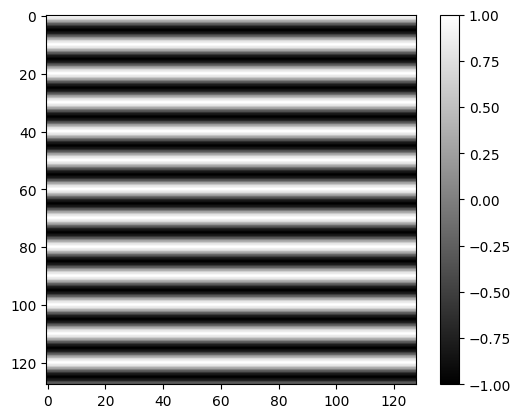

<Figure size 640x480 with 0 Axes>

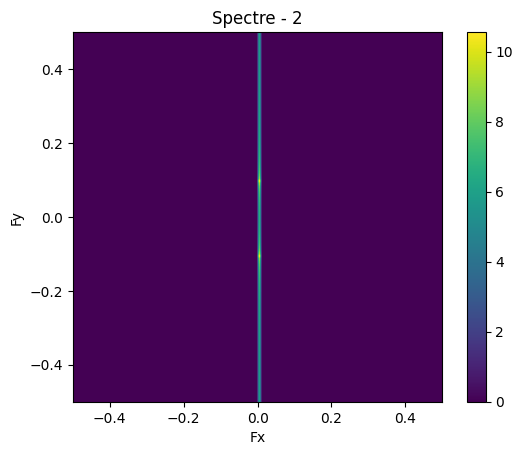

In [111]:
img = atom(N, M, freq[1][0], freq[1][1])
affiche_image(img)
fourier2d(img, 1)

Analyse de l'image 2 :
- Description : bandes horizontales d'espacement régulié
- Très forte intensité de fréquence à -0.1 et 0.1 fy

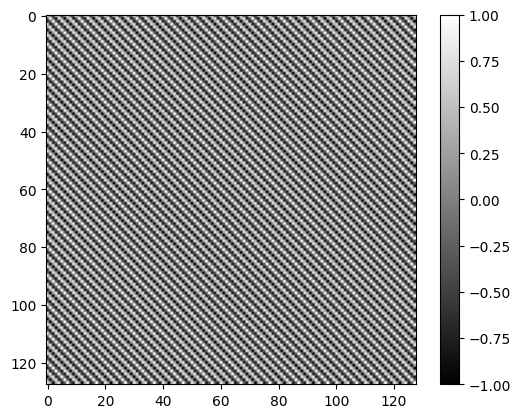

<Figure size 640x480 with 0 Axes>

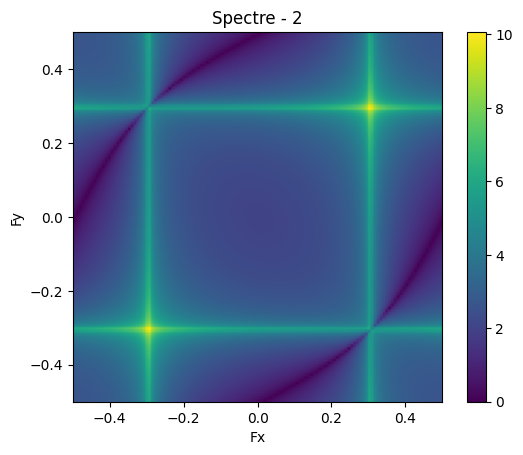

In [112]:
img = atom(N, M, freq[2][0], freq[2][1])
affiche_image(img)
fourier2d(img, 1)

Analyse de l'image 3 :
- Description : diagonales régulières, obliques à -45 degrés.
- Très forte intensité de fréquence à (-0.3,-0.3) et (0.3,0.3) (fx ,fy)

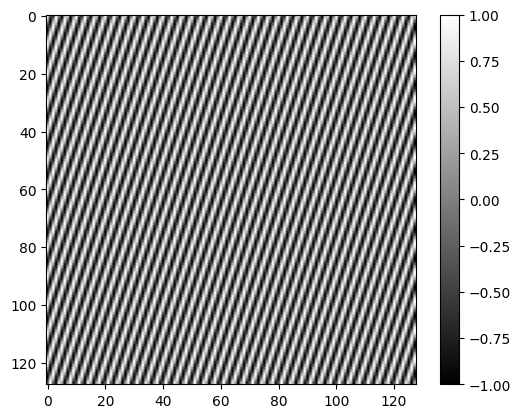

<Figure size 640x480 with 0 Axes>

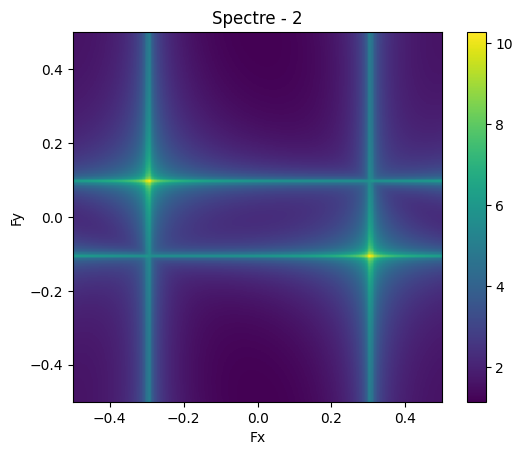

In [113]:
img = atom(N, M, freq[3][0], freq[3][1])
affiche_image(img)
fourier2d(img, 1)

Analyse de l'image 4 :
- Description : diagonales régulières, particulièrement verticales.
- Très forte intensité de fréquence à (-0.3,0.1) et (0.3,-0.1) (fx ,fy)

### 2.1.b. Contour

L’une des informations essentielles dans les images est l’information contour (limite entre deux objets). Afin d’étudier comment se traduit un contour simple dans le plan fréquentiel, vous allez analyser des images présentant deux zones homogènes avec une seule rupture entre les deux zones (un contour) selon une direction précise.

<div style="border:2px solid black; padding 0.5px;">
<strong>Travail demandé :</strong>

- Créer 3 images : rupt0, rupt1 et rupt2 contenant un contour horizontal, vertical et oblique.
- Pour ces 3 images :
  1.  Afficher l’image.
  2.  Visualiser le spectre.
  3.  Commenter en mettant en avant la corrélation de ce spectre avec l’information contenue dans l’image.
- Conclure sur la localisation d’une rupture dans le domaine fréquentiel.

</div>


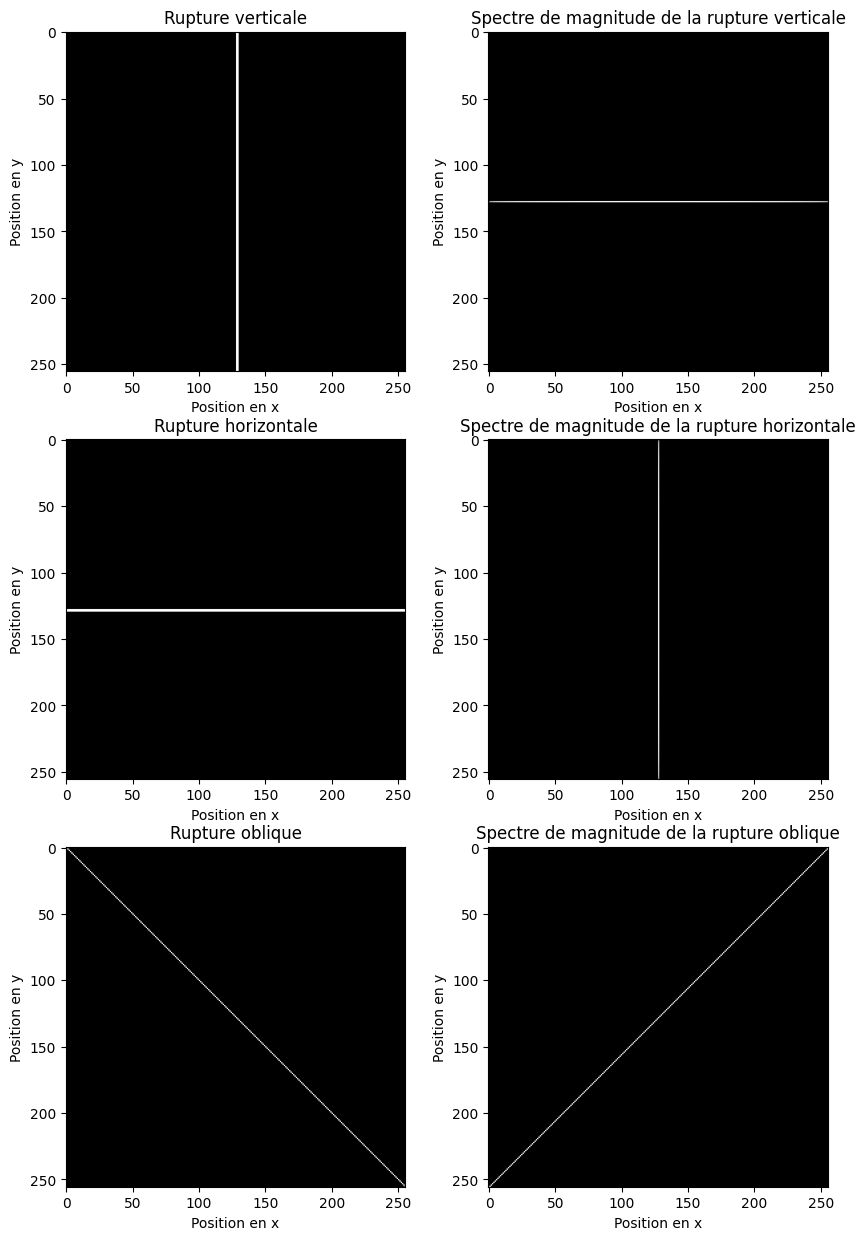

In [114]:

width = 256
max_rgb = 255
mid = width // 2

rupt0 = np.zeros((width, width, 3), dtype=np.uint8)
rupt0[0:width, mid:mid + 2] = [max_rgb, max_rgb, max_rgb]

rupt1 = np.zeros((width, width, 3), dtype=np.uint8)
rupt1[mid:mid + 2, 0:width] = [max_rgb, max_rgb, max_rgb]

rupt2 = np.zeros((width, width, 3), dtype=np.uint8)
for X in range(0, width):
    rupt2[X, X] = [max_rgb, max_rgb, max_rgb]

plt.figure(figsize=(10, 15))
plt.subplot(3, 2, 1)
plt.title("Rupture verticale")
plt.xlabel("Position en x")
plt.ylabel("Position en y")
plt.imshow(rupt0)
plt.subplot(3, 2, 2)
plt.imshow(fft2_d_spectrum(rupt0), cmap='gray')
plt.title("Spectre de magnitude de la rupture verticale")
plt.xlabel("Position en x")
plt.ylabel("Position en y")
plt.subplot(3, 2, 3)
plt.title("Rupture horizontale")
plt.xlabel("Position en x")
plt.ylabel("Position en y")
plt.imshow(rupt1)
plt.subplot(3, 2, 4)
plt.imshow(fft2_d_spectrum(rupt1), cmap='gray')
plt.title("Spectre de magnitude de la rupture horizontale")
plt.xlabel("Position en x")
plt.ylabel("Position en y")
plt.subplot(3, 2, 5)
plt.title("Rupture oblique")
plt.xlabel("Position en x")
plt.ylabel("Position en y")
plt.imshow(rupt2)
plt.subplot(3, 2, 6)
plt.imshow(fft2_d_spectrum(rupt2), cmap='gray')
plt.title("Spectre de magnitude de la rupture oblique")
plt.xlabel("Position en x")
plt.ylabel("Position en y")

plt.show()

### 2.1.c. Texture

Vous allez maintenant étudier des images réelles.

<div style="border:2px solid black; padding 0.5px;">
<strong>Travail demandé :</strong>

- Charger l’image Metal0007G
- Visualiser l’image
- Visualiser son spectre.
- Commenter les paramètres pertinents du spectre. En déduire des caractéristiques particulières sur le motif présent dans l’image.
- Même travail pour les images :
	- Water0000G
	- Leaves0012G
N’oubliez pas de comparer aussi les différences entre les images.
</div>


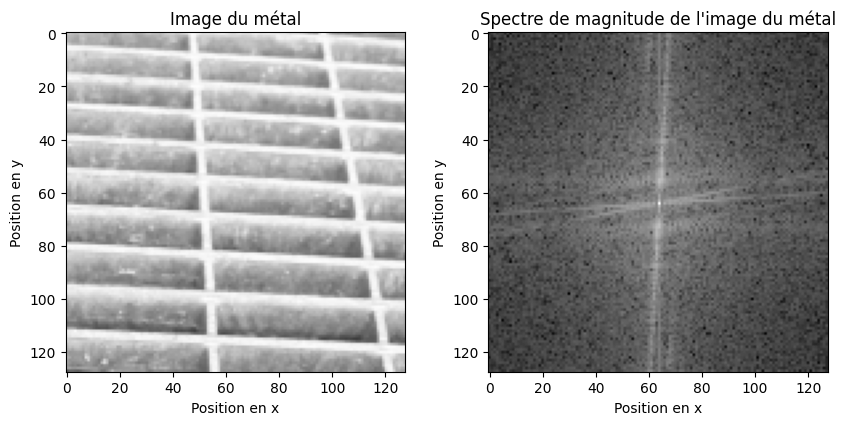

In [115]:
img_metal = cv.imread(basepath+"Metal0007GP.png")

plt.figure(figsize=(10, 15))
plt.subplot(3, 2, 1)
plt.title("Image du métal")
plt.xlabel("Position en x")
plt.ylabel("Position en y")
plt.imshow(img_metal)
plt.subplot(3, 2, 2)
plt.imshow(fft2_d_spectrum(img_metal), cmap='gray')
plt.title("Spectre de magnitude de l'image du métal")
plt.xlabel("Position en x")
plt.ylabel("Position en y")
plt.show()

On remarque que le spectre contient deux traits, un vertical et un horizontal, qui sont de sens inverse par rapport, respectivement, aux axes des abscisses et des ordonnés.

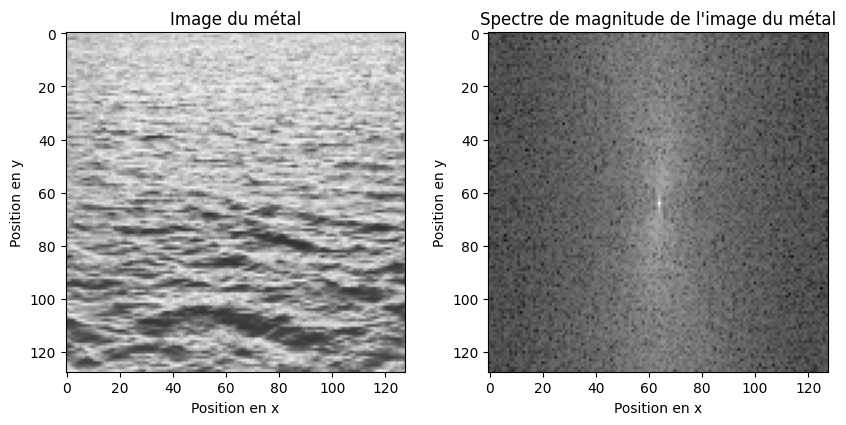

In [116]:
img_water = cv.imread(basepath+"Water0000GP.png")

plt.figure(figsize=(10, 15))
plt.subplot(3, 2, 1)
plt.title("Image du métal")
plt.xlabel("Position en x")
plt.ylabel("Position en y")
plt.imshow(img_water)
plt.subplot(3, 2, 2)
plt.imshow(fft2_d_spectrum(img_water), cmap='gray')
plt.title("Spectre de magnitude de l'image du métal")
plt.xlabel("Position en x")
plt.ylabel("Position en y")
plt.show()


On remarque un ligne très diffuse verticale dans le spectre de magnitude. Elle traduit le caractrère assez horizontal que forment les vaguelettes à la surface de l'eau.

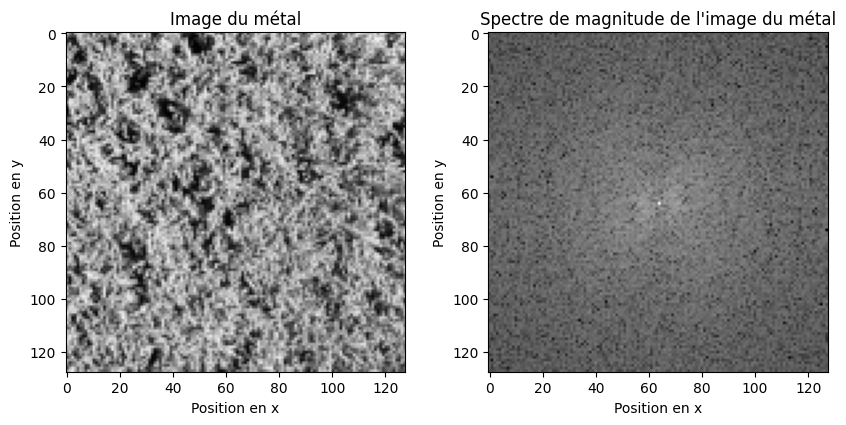

In [117]:
img_leaves = cv.imread(basepath+"Leaves0012GP.png")

plt.figure(figsize=(10, 15))
plt.subplot(3, 2, 1)
plt.title("Image du métal")
plt.xlabel("Position en x")
plt.ylabel("Position en y")
plt.imshow(img_leaves)
plt.subplot(3, 2, 2)
plt.imshow(fft2_d_spectrum(img_leaves), cmap='gray')
plt.title("Spectre de magnitude de l'image du métal")
plt.xlabel("Position en x")
plt.ylabel("Position en y")
plt.show()

Il n'y a pas vraiment de pattern qui se dessinne sur l'image de feuille Si ce n'est que le soleil semble éclairer depuis le Nord-Nord-Ouest ce qui laisse un leger trait horizontal Nord-Est-Est

## 2.2 Le phénomène de repliement

Lors du processus d’échantillonnage d’un signal 1D ou 2D, il faut respecter certaines contraintes pour que cette étape de discrétisation ne se fasse pas au détriment de l’information contenue dans le signal. Cette contrainte se traduit en fonction de la fréquence maximale présente dans le signal analysé. Si l’on prend l’exemple d’un signal monochromatique 1D tel que 

$$
    s(t)=\cos(2\pi t)(f_{\text{max}}=1\text{Hz})
$$

Intuitivement on en déduit que pour ne pas dégrader l'information (à savoir la fréquence fondamentale présente dans le signal) il faut prendre au moins deux points par période du signal ($ F_e >2f_{max} $). D’une façon générale, cette contrainte est formalisée par le théorème de Shannon. Lorsque cette contrainte n’est pas respectée, il y a un phénomène de repliement spectral (dû à la périodisation du spectre du signal échantillonné). Prenons l’exemple simple d’un signal monochromatique de fréquence $ 0.75\text{Hz} $, nous vérifions par le théoème de Shannon et le contenu fréquentiel va alors se replier autour de $ F_e/2 $. Nous illustrons ce phénomène sur la figure 1.

<figure>
  <img src="cr_img/2.2.1.png" style="width:50%">
  <figcaption>Figure 1 - Repliement spectral dans le cadre d’un signal</figcaption>
</figure>


Les mêmes conditions sont présentes dans le cadre d’une image. Simplement cette contrainte sur la fréquence d’échantillonnage s’exerce selon les lignes et les colonnes. Lorsque la condition de Shannon n’est pas remplie selon l’une ou l’autre des 2 directions (ou les deux) nous avons alors un phénomène de repliement spectral. Nous illustrons ce phénomène sur la figure 2 à partir d’un exemple. Soit le signal 2D
continu composé d’une seule fréquence fondamentale de coordonnées (0.35, 0.75). Nous échantillonnons ce signal avec une fréquence de 1 selon les lignes et les colonnes. On constate que cet échantillonnage ne respecte pas la condition de Shannon (dans la direction verticale). Le spectre, après échantillonnage, devient périodique de période 1. Donc, comme nous l’illustrons sur la figure, tous les blocs de coordonnées :

$$
    [0.5 \times k; 0.5 \times (k+2)] \times [ 0.5 \times k_2, 0.5 \times (k_2 + 2) ] \text{ avec } k,k_2\in \mathbb{Z}
$$

vont être copiés dans le bloc $ [-0.5,0.5]\times[-0.5,0.5] $

Dans cet exemple, ce phénomène explique à la fois les changements de sens des bandes ainsi que leurs "ralentissements".
<figure>
  <img src="cr_img/2.2.2.png" style="width:50%">
  <figcaption>Figure 2 - Repliement spectral dans le cadre d’une image</figcaption>
</figure>

Nous allons analyser le phénomène de repliement sur une image synthétique composée de bandes périodiques se répétant à une fréquence $f_1$ selon $ n $ et $ f_2 $ selon $ m $.


<div style="border:2px solid black; padding 0.5px;">
<strong>Travail demandé :</strong>

- Créer une image 128 × 128 présentant des oscillations de fréquences ($F_e= 1$) 0.15 selon $n$ et 0.37 selon $m$.
- Visualiser l’image (pour voir correctement le sens d’oscillation, vous pourrez binariser l’image).
- Commenter.
- Calculer la transformée de Fourier et afficher son spectre. Commenter.
- Rééchantillonner ($ F_e’=F_e/2 $) l’image en sous-échantillonnant l’image initiale.
- Afficher la nouvelle image ainsi que son spectre.
- Commenter l’image et expliquer le phénomène justifiant le résultat
</div>

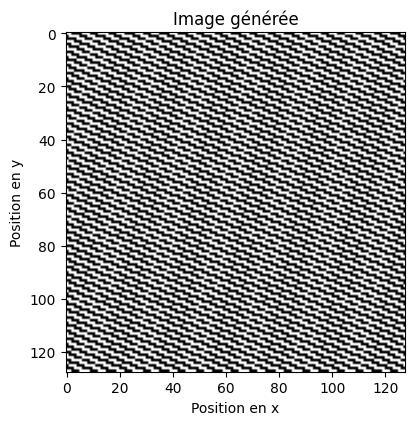

<Figure size 640x480 with 0 Axes>

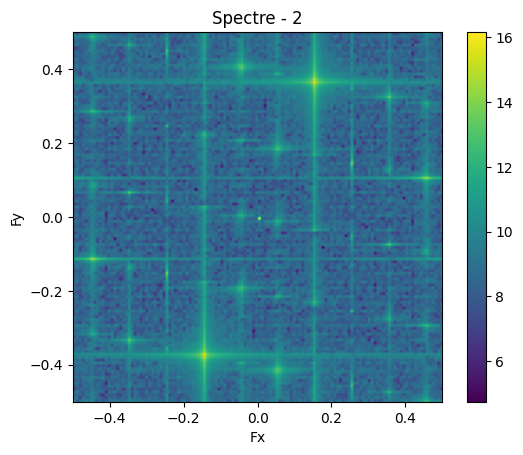

In [118]:

img = threshold(atom(128, 128, 0.15, 0.37), 0)
plt.figure(figsize=(10, 15))
plt.subplot(3, 2, 1)
plt.title("Image générée")
plt.xlabel("Position en x")
plt.ylabel("Position en y")
plt.imshow(img, cmap='gray')
fourier2d(img, 1)
plt.show()


L'image générée fait apparaître à la fois des motifs verticaux et horizontaux. Cela se traduit sur le spectre de magnitude de l'image générée par des motifs particulièrement marqués.
On remaque aussi des intensitées particulièrement fortes aux points (-0.15, -0.37) et (0.15, 0.37)

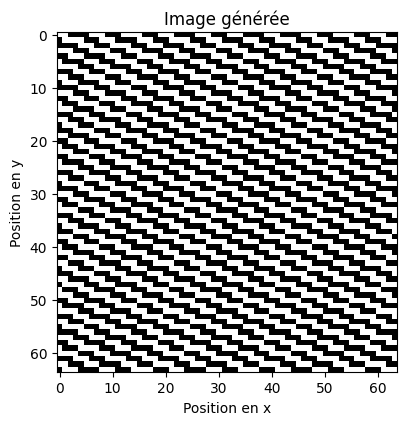

<Figure size 640x480 with 0 Axes>

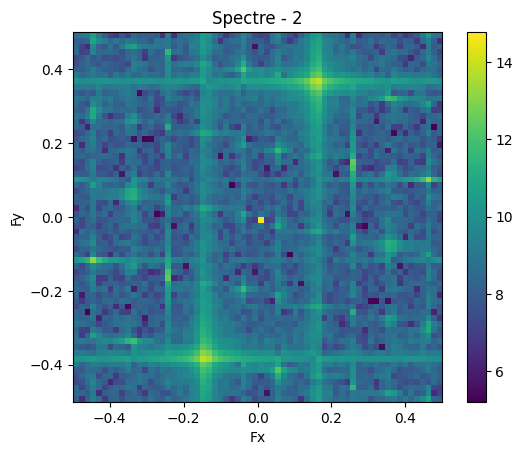

In [122]:

img = threshold(atom(64, 64, 0.15, 0.37), 0)
plt.figure(figsize=(10, 15))
plt.subplot(3, 2, 1)
plt.title("Image générée")
plt.xlabel("Position en x")
plt.ylabel("Position en y")
plt.imshow(img, cmap='gray')
fourier2d(img, 1)


Dans cette version sous-échantillonnée, la précision de l'endroit où l'intensité est la plus forte diminue. On devine donc moins facilement quelle est la fréquence fondamentale. En cela, elle est dégradée.

## 3. Changement d’espaces colorimétriques (comparaison HSV/IHLS)

- A l’aide de la fonction rgb2hsv d’octave ou python (librairie opencv), effectuer le changement de coordonnées dans cet espace.
- Coder un système d’affichage niveau de gris pour la luminosité et la saturation et couleur pour la teinte (affichage de la teinte uniquement en couleur, cf images présentées en cours). L’affichage peut être validé sur l’image `confiserie-smarties-lentilles_121-50838.jpg`.
- Coder le changement d’espace IHSL donné dans le cours colorimétrie.
- Comparer des images transformées dans les deux espaces. Quelle sont les limites de l’espace HSV ?

Text(0, 0.5, 'Position en y')

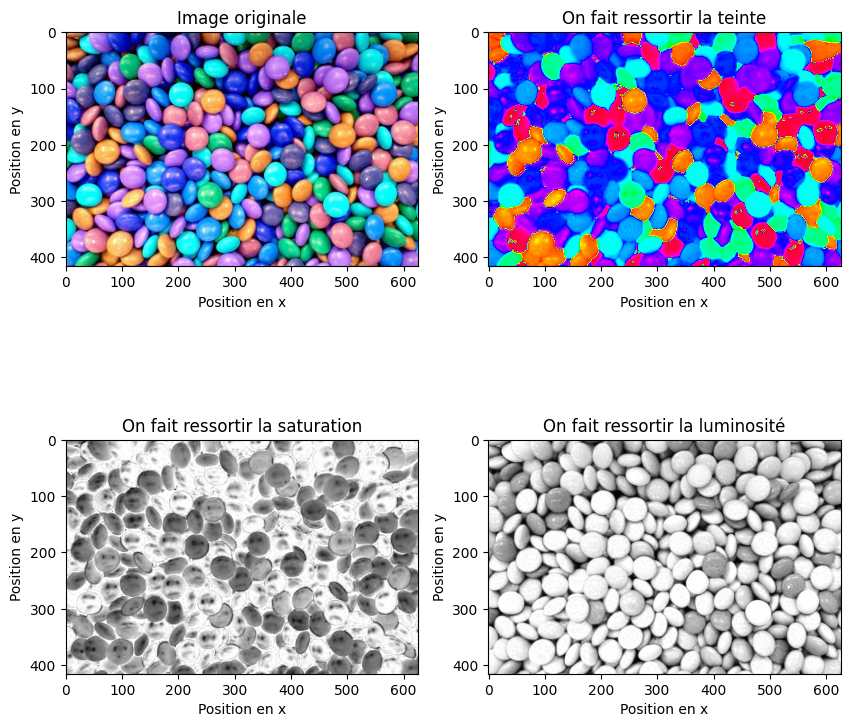

In [153]:
smarties = cv.imread(basepath+"confiserie-smarties-lentilles_121-50838.jpg")
figure = plt.figure(figsize=(10, 15))
plt.subplot(3, 2, 1)
plt.imshow(smarties)
plt.title("Image originale")
plt.xlabel("Position en x")
plt.ylabel("Position en y")



plt.subplot(3, 2, 2)
hsv_img = cv.cvtColor(smarties, cv.COLOR_RGB2HSV)
h, s, v = cv.split(hsv_img)
plt.imshow(h, "hsv")
plt.title("On fait ressortir la teinte")
plt.xlabel("Position en x")
plt.ylabel("Position en y")
plt.subplot(3, 2, 3)
plt.imshow(s, "grey")
plt.title("On fait ressortir la saturation")
plt.xlabel("Position en x")
plt.ylabel("Position en y")
plt.subplot(3, 2, 4)
plt.imshow(v, "grey")
plt.title("On fait ressortir la luminosité")
plt.xlabel("Position en x")
plt.ylabel("Position en y")


## 4. Segmentation d'images

- En utilisant le seuillage vu lors du premier TP segmenter les smarties jaunes de l’image `confiserie-smarties-lentilles_121-50838.jpg`.
- Refaire l’exercice pour segmenter les smarties bleus de la même image.
- Améliorer la segmentation en utilisant les outils de morphologie mathématique (ouverture, fermeture par exemple).
- L’objectif est maintenant d’éliminer le ciel dans l’image `CeriserP.jpg`. Quel canal/espace est le plus judicieux selon vous ?
- Segmenter d’autres zones sur d’autres images de votre choix. Justifier le choix des images et des canaux utilisés.
- Une fois la segmentation effectuée, modifier la couleur de la zone segmentée sur l’image couleur.

## Pour aller plus loin (algorithme des k-means)
1. Segmenter les images de votre choix en utilisant l’algorithme des k-means. Choisir judicieusement le nombre de classes en fonctions des éléments que vous souhaitez extraire.
2. Commenter les segmentations obtenues en fonction des espaces utilisés pour le calcul.